In [8]:
from PIL import Image
import numpy as np
import pandas as pd
import os
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

In [14]:
img1=cv.imread("01.tif",cv.IMREAD_GRAYSCALE)

In [15]:
m1=img1.copy()

In [16]:
m1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [58]:
pp=m1-np.random.rand()*200

In [59]:
pp

array([[224.49004565, 224.49004565, 224.49004565, ..., 224.49004565,
        224.49004565, 224.49004565],
       [224.49004565, 224.49004565, 224.49004565, ..., 224.49004565,
        224.49004565, 224.49004565],
       [224.49004565, 224.49004565, 224.49004565, ..., 224.49004565,
        224.49004565, 224.49004565],
       ...,
       [224.49004565, 224.49004565, 224.49004565, ..., 224.49004565,
        224.49004565, 224.49004565],
       [224.49004565, 224.49004565, 224.49004565, ..., 224.49004565,
        224.49004565, 224.49004565],
       [224.49004565, 224.49004565, 224.49004565, ..., 224.49004565,
        224.49004565, 224.49004565]])

In [60]:
im = Image.fromarray(pp)
im.show()

In [61]:
cv.imwrite("pp.jpg", out)

True

In [52]:
def gasuss_noise(image, mean=0, var=0.001):
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip=-1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    #cv.imshow("gasuss", out)
    return out

In [53]:
out=gasuss_noise(m1)

In [54]:
out

array([[255, 255, 254, ..., 255, 255, 255],
       [255, 253, 249, ..., 250, 254, 255],
       [255, 254, 255, ..., 255, 255, 255],
       ...,
       [255, 245, 255, ..., 254, 241, 255],
       [255, 244, 255, ..., 253, 255, 254],
       [255, 249, 249, ..., 255, 252, 255]], dtype=uint8)

In [55]:
cv.imwrite("out.jpg", out)

True

In [56]:
im = Image.fromarray(out)

In [57]:
im.show()

In [12]:
im = Image.fromarray(img1)

In [13]:
im.show()

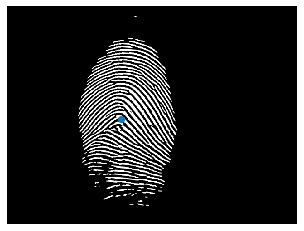

In [15]:
plt.imshow(img1,cmap='gray')
plt.axis('off') # 不显示坐标轴
plt.scatter(250,248)

In [8]:
dirs=os.listdir("./img")

In [9]:
for file in dirs:
    print(file)
#     print(type(file))

.ipynb_checkpoints
01.tif
02.tif
03.tif
04.tif
05.tif
06.tif
07.tif
08.tif
09.tif
10.tif
11.tif
12.tif
13.tif
14.tif
15.tif
16.tif


In [12]:
a=cv.Canny(img1,50,150)

In [13]:
a.shape

(480, 640)

In [19]:
cv.imwrite("canny.jpg",a)

True

In [20]:
cv.imshow("canny",cv.imread("canny.jpg"))
cv.waitKey()
cv.destroyAllWindows()

In [24]:
ret, img_bin = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)

In [25]:
img_bin

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [26]:
ret

127.0

In [31]:
# 3.连通域分析
contours, hierarchy = cv.findContours(img_bin,
                                                cv.RETR_LIST,
                                                cv.CHAIN_APPROX_SIMPLE)

In [37]:
# 4.获取最小外接矩形并打印
min_rect = cv.minAreaRect(contours[0])
print("返回值min_rect:\n", min_rect)
rect_points = cv.boxPoints(min_rect)
print("返回值rect_points:\n", rect_points)
rect_points = np.int0(rect_points)

# 5.绘制最小外接矩形
# img_result = img_src.copy()
# cv.drawContours(img_result, [rect_points], 0, (255, 255, 255), 2)/

# 6.显示结果图片
# cv2.imshow("img_src", img_src)
# cv.imshow("img_result", img_result)

cv.waitKey()
cv.destroyAllWindows()

返回值min_rect:
 ((282.5000305175781, 442.00006103515625), (2.1213202476501465, 2.1213202476501465), -45.0)
返回值rect_points:
 [[282.50003 443.50006]
 [281.00003 442.00006]
 [282.50003 440.50006]
 [284.00003 442.00006]]


(-0.5, 639.5, 479.5, -0.5)

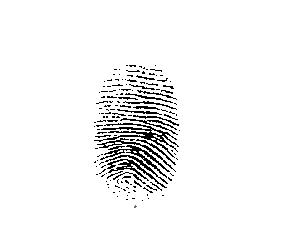

In [43]:
ad=cv.drawContours(img_bin, [rect_points], 0, (111, 111,111), 2)
plt.imshow(ad,cmap='gray')
plt.axis('off') # 不显示坐标轴

In [37]:
import cv2
img=cv.imread("01.tif",cv.IMREAD_GRAYSCALE)
gradX = cv2.Sobel(img, cv2.CV_16S, 1, 0, ksize=5)
gradY = cv2.Sobel(img, cv2.CV_16S, 0, 1, ksize=5)


In [38]:
img.shape


(480, 640)

In [39]:
gradX.shape

(480, 640)

In [40]:
gradX

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [41]:
gradY.shape



(480, 640)

In [78]:
def ar(y,x):
    if (y>0) and (x==0):
        return np.pi/2
    elif (y<0) and (x==0):
        return -np.pi/2
    else:
        return np.arctan(y/x)

In [77]:
# ar(gradY,gradX)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [80]:
theta=np.zeros((gradX.shape[0],gradX.shape[1]))

In [81]:
for i in range(gradX.shape[0]):
    for j in range(gradX.shape[1]):
        theta[i,j]=ar(gradY[i,j],gradX[i,j])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in short_scalars
  import sys


In [82]:
-np.pi/2

-1.5707963267948966

In [83]:
theta.shape[0]

480

In [84]:
theta.shape[1]

640

In [85]:
l=range(2,theta.shape[0])
l[-1]

479

In [5]:
markcore=[]
markdelta=[]
for i in range(1,theta.shape[0]-1):
    for j in range(1,theta.shape[1]-1):
        m1=
        sum=theta[i-1,j-1]+theta[i-1,j]+theta[i-1,j+1]+theta[i,j-1]+theta[i,j+1]+theta[i+1,j-1]+theta[i+1,j]+theta[i+1,j+1]
        if sum==np.pi:
            markcore.append([i,j])
            print("core\n")
        elif sum==-np.pi:
            markdelta.append([i,j])
            print("delta\n")

SyntaxError: invalid syntax (<ipython-input-5-0ca4a8003265>, line 5)

In [6]:
markcore[0][0],markcore[0][1]

NameError: name 'markcore' is not defined

In [11]:
plt.imshow(img,cmap='gray')
plt.axis('off') # 不显示坐标轴
plt.scatter(markcore[0][0],markcore[0][1])
plt.scatter(markcore[1][0],markcore[1][1])
plt.scatter(266,384)

NameError: name 'img' is not defined

In [22]:

a = np.random.random((8,8))

In [23]:
a


array([[0.66113172, 0.4521677 , 0.4077956 , 0.93894652, 0.7261341 ,
        0.9795958 , 0.67919047, 0.33261725],
       [0.93507315, 0.87671965, 0.18317826, 0.81349544, 0.2533713 ,
        0.17623009, 0.51754763, 0.4570763 ],
       [0.00782305, 0.30127381, 0.37051533, 0.47473596, 0.3268685 ,
        0.81087802, 0.65951612, 0.17295539],
       [0.28431485, 0.29250125, 0.09516154, 0.32588401, 0.48379733,
        0.70517567, 0.99148759, 0.79907119],
       [0.50831287, 0.59978857, 0.57056251, 0.2071168 , 0.74648987,
        0.32306761, 0.0495416 , 0.94073476],
       [0.02174692, 0.91467814, 0.23926422, 0.86205102, 0.50665385,
        0.45077712, 0.73140928, 0.70029709],
       [0.28287552, 0.32096582, 0.85929041, 0.80708716, 0.02076839,
        0.78471659, 0.09279281, 0.31325283],
       [0.68815869, 0.34050346, 0.76675787, 0.2184581 , 0.86813261,
        0.64163209, 0.29209318, 0.67706336]])

In [24]:
a[2:5]

array([[0.00782305, 0.30127381, 0.37051533, 0.47473596, 0.3268685 ,
        0.81087802, 0.65951612, 0.17295539],
       [0.28431485, 0.29250125, 0.09516154, 0.32588401, 0.48379733,
        0.70517567, 0.99148759, 0.79907119],
       [0.50831287, 0.59978857, 0.57056251, 0.2071168 , 0.74648987,
        0.32306761, 0.0495416 , 0.94073476]])

In [30]:
a[:5,:5].sum()

11.843159674795556

In [31]:
np.floor((5-1)/2)

2.0

In [5]:
mx=np.random.random((2,3))

In [7]:
for i in mx:
    print(i.mean())

0.20546903238495037
0.052760732758342845
